# Recommender Systems using Netflix Dataset




## Author:
Yamini Manral (manral.y@northeastern.edu)

## Abstract

This notebook provides a comprehensive guide for building a recommendation system for movies and TV shows using content-based filtering techniques, applied to a Netflix dataset. Content-based filtering recommends items that match a user's previous preferences by focusing on the intrinsic attributes of the items. In this notebook, we utilize metadata such as genre, cast, and directors to create a content-based recommendation system.

The process begins with data preprocessing, which includes data cleaning and feature engineering. Next, we calculate cosine similarity to measure the similarity between items. These similarity scores are then used to recommend movies and TV shows to users based on their viewing history. The notebook includes detailed step-by-step instructions, code snippets, and visual aids to guide you through the development of a content-based recommendation system using a real-world dataset.

## Recommendation System Overview

- Machine learning models that provide personalized suggestions to users based on past behavior, preferences, or other characteristics.
- Widely used in e-commerce, social media, music and video streaming services, and other online platforms.
- Aim to suggest products, content, or services likely to interest the user.

Netflix Movies Data Set: https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows



### Types of Recommendation Systems:

#### Content-Based Filtering:
- Recommends items similar to those the user has interacted with before.
- Relies on item attributes such as genre, cast, and directors.
#### Collaborative Filtering:
- Recommends items based on the preferences of similar users.
- Utilizes user-item interactions to find patterns.
#### Hybrid Systems:
- Combine content-based and collaborative filtering approaches to leverage the strengths of both.

#### Techniques Used in Recommendation Systems:

- Natural Language Processing (NLP)
- Machine Learning Algorithms
- Deep Learning Models

![Netflix_Logo_RGB](Netflix_Logo_RGB.png)

## Problem Statement

The goal is to develop a recommendation system capable of analyzing a user's viewing history and preferences to provide personalized suggestions for movies and TV shows. This system takes input in the form of the user's past viewing activities, including movies watched and preferred genres. The output is a curated list of recommended content that closely matches the user's tastes and interests.

For example, if User A has previously watched movies like "Movie X" and "Movie Y" and tends to enjoy action and adventure genres, the recommendation system will use this information to suggest similar content. It might recommend "Movie Z" and "TV Show W" because they share attributes such as genre, cast, or director with the user's preferences.

In essence, the recommendation system leverages user data to deliver tailored recommendations, enhancing the user's viewing experience by offering relevant and engaging content.

## Data and Library imports


### Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### Titles imports

In [6]:
# Importing the Netflix Titles data set into the DataFrame
netflix_titles = pd.read_csv("Netflix_Titles_Dataset.csv", encoding='utf-8')

In [7]:
# Resetting index for the DataFrame by dropping the Index column
merged_df = pd.concat([netflix_titles], axis = 0).reset_index()
merged_df.drop(['index'], axis=1, inplace=True)

In [8]:
# Displaying the DataFrame
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.601,NaN
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],NaN,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],NaN,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],NaN,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],NaN,tt0079817,7.3,216307.0,75.699,7.246


In [9]:
# Print the number of rows and columns in the merged dataset
merged_df.shape

(6137, 15)

In [10]:
# Printing Top 10 popular Titles based on TMDB rating
popular_titles = merged_df.sort_values(by='tmdb_popularity', ascending=False)[['title', 'tmdb_popularity']].head(10)
print("Top 10 most popular titles on TMDB:")
print(popular_titles)

Top 10 most popular titles on TMDB:
                         title  tmdb_popularity
675                  The Flash         1078.637
6049                  Triptych         1005.232
188             Grey's Anatomy         1003.948
4258                 Wednesday          833.087
4291                    Narvik          779.484
4993               Lesson Plan          755.987
187           The Walking Dead          656.772
6068  The Lying Life of Adults          626.158
6063                    JUNG_E          598.277
676              The Blacklist          592.555


In [11]:
# Printing Top 10 popular Titles based on IMDB rating
highest_rated_titles = merged_df.sort_values(by='imdb_score', ascending=False)[['title', 'imdb_score']].head(10)
print("Top 10 highest rated titles on IMDB:")
print(highest_rated_titles)

Top 10 highest rated titles on IMDB:
                           title  imdb_score
2343             Crazy Delicious         9.6
2634                    #ABtalks         9.6
186                 Breaking Bad         9.5
529                     Khawatir         9.5
3186                  Our Planet         9.3
192   Avatar: The Last Airbender         9.3
2640                  The Chosen         9.3
1062                  Reply 1988         9.2
2663              The Last Dance         9.1
1849                   My Mister         9.1


## Data Cleaning

In [12]:
# Displaying information of the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [13]:
# Checking for the count of NULL values in each column
merged_df.isna().sum()

id                         0
title                      0
type                       0
description               23
release_year               0
age_certification       2743
runtime                    0
genres                     0
production_countries       0
seasons                 3831
imdb_id                  396
imdb_score               468
imdb_votes               484
tmdb_popularity           76
tmdb_score               252
dtype: int64

### Data Visualization

Text(0.5, 1.0, 'Distribution of Missing Values')

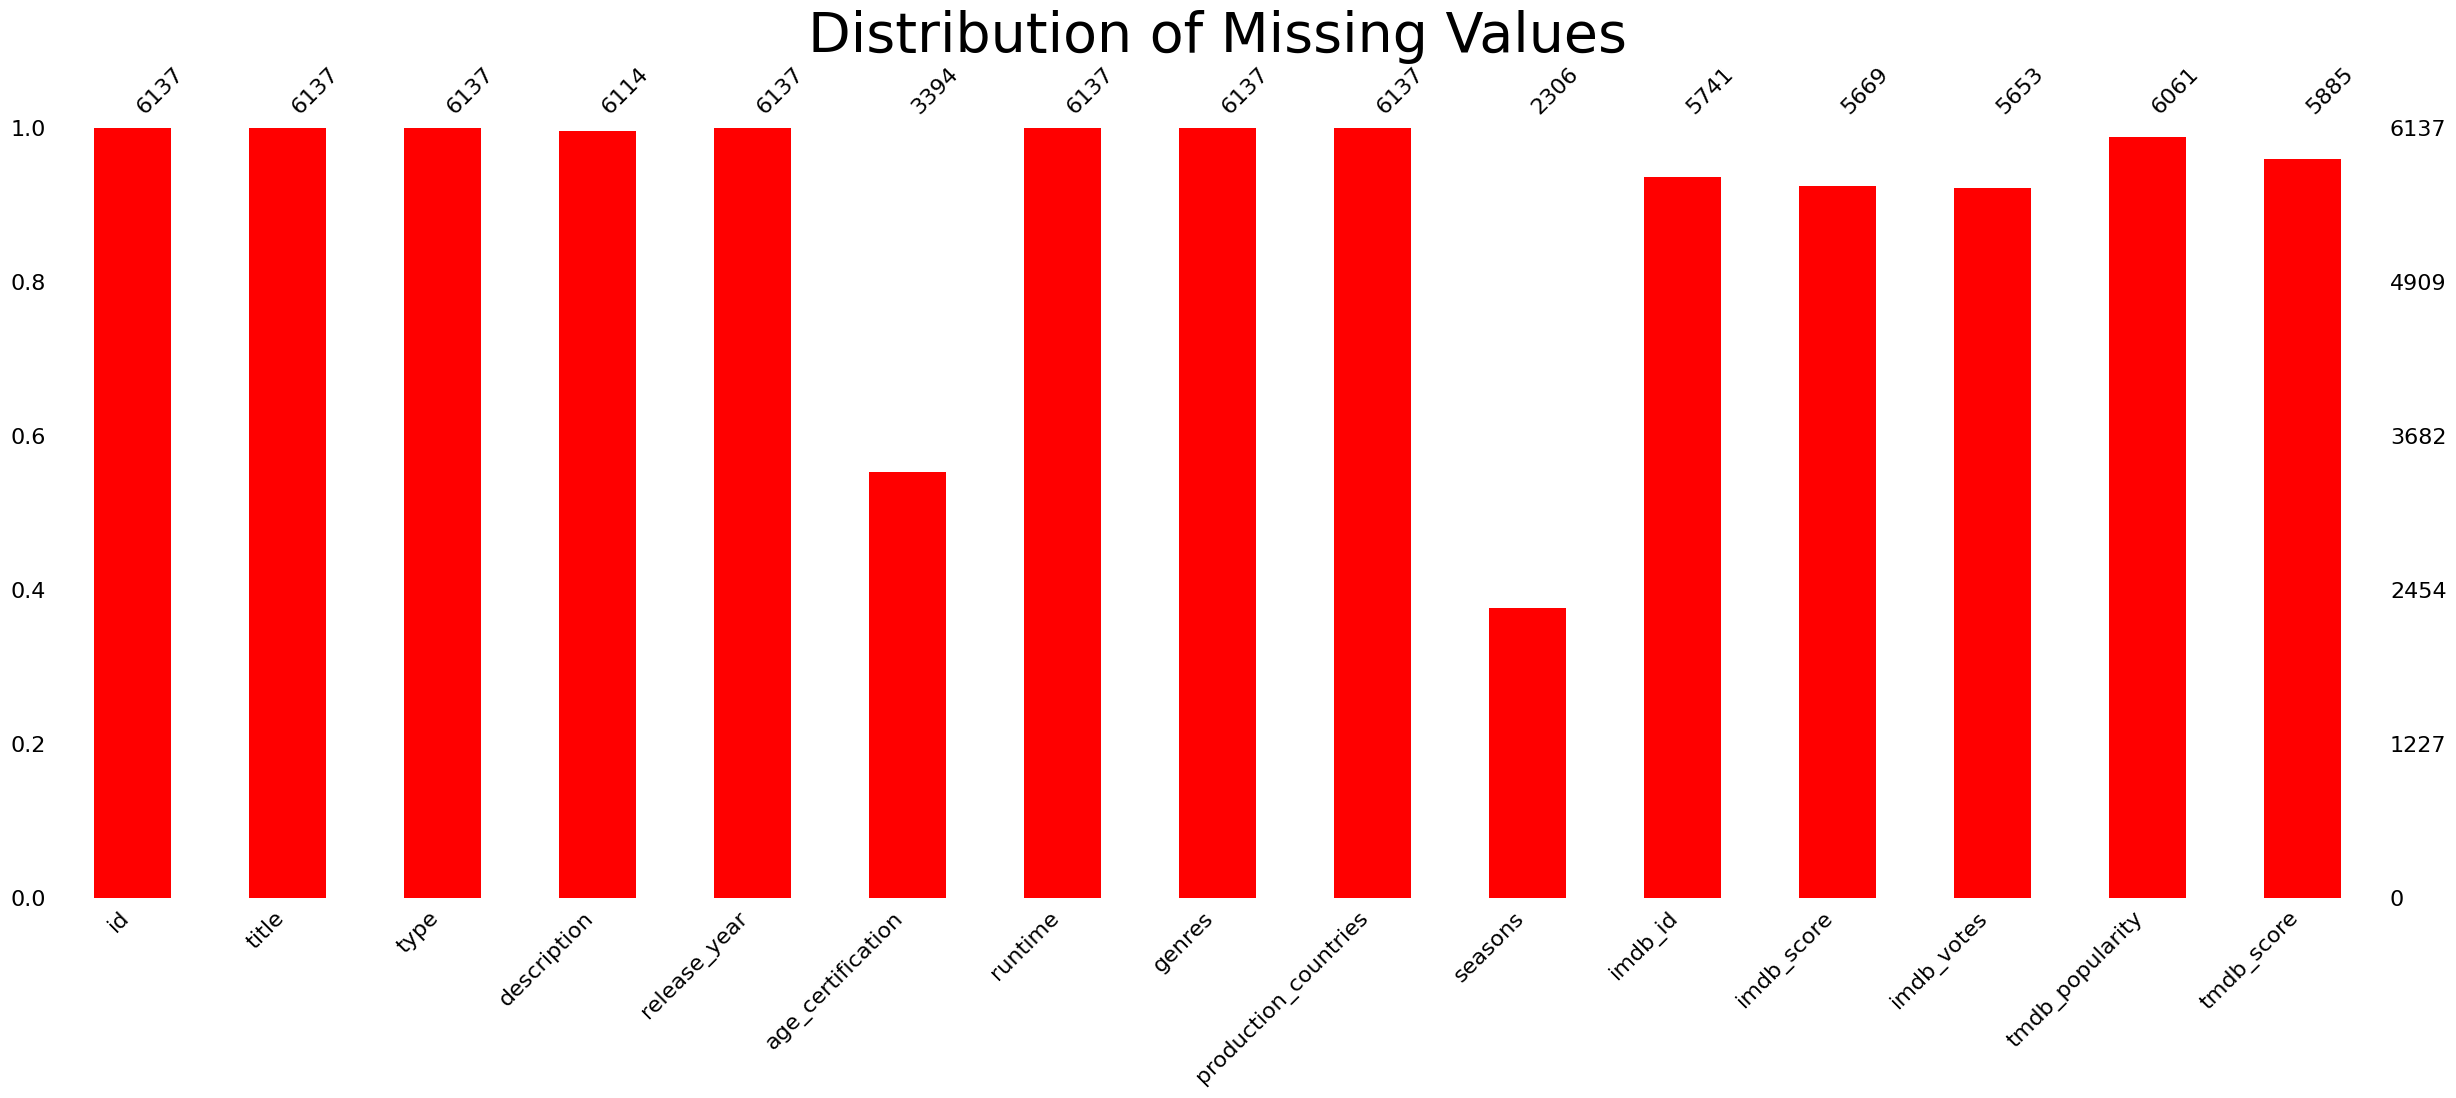

In [14]:
# Visualizing the total number of records present in each column
msno.bar(merged_df, figsize=(30,10), color=('red'))
plt.title('Distribution of Missing Values', fontsize = 40)

We can observe from the above graph that the columns 'Age_Certification', 'Seasons', 'IMDB_ID', 'IMDB_Score', 'IMDB_Votes', 'TMDB_Popularity' and 'TMDB_Score' have missing values. They need to be handled using Exploratory Data Analysis so that we can perform further processing.

<Figure size 1500x500 with 0 Axes>

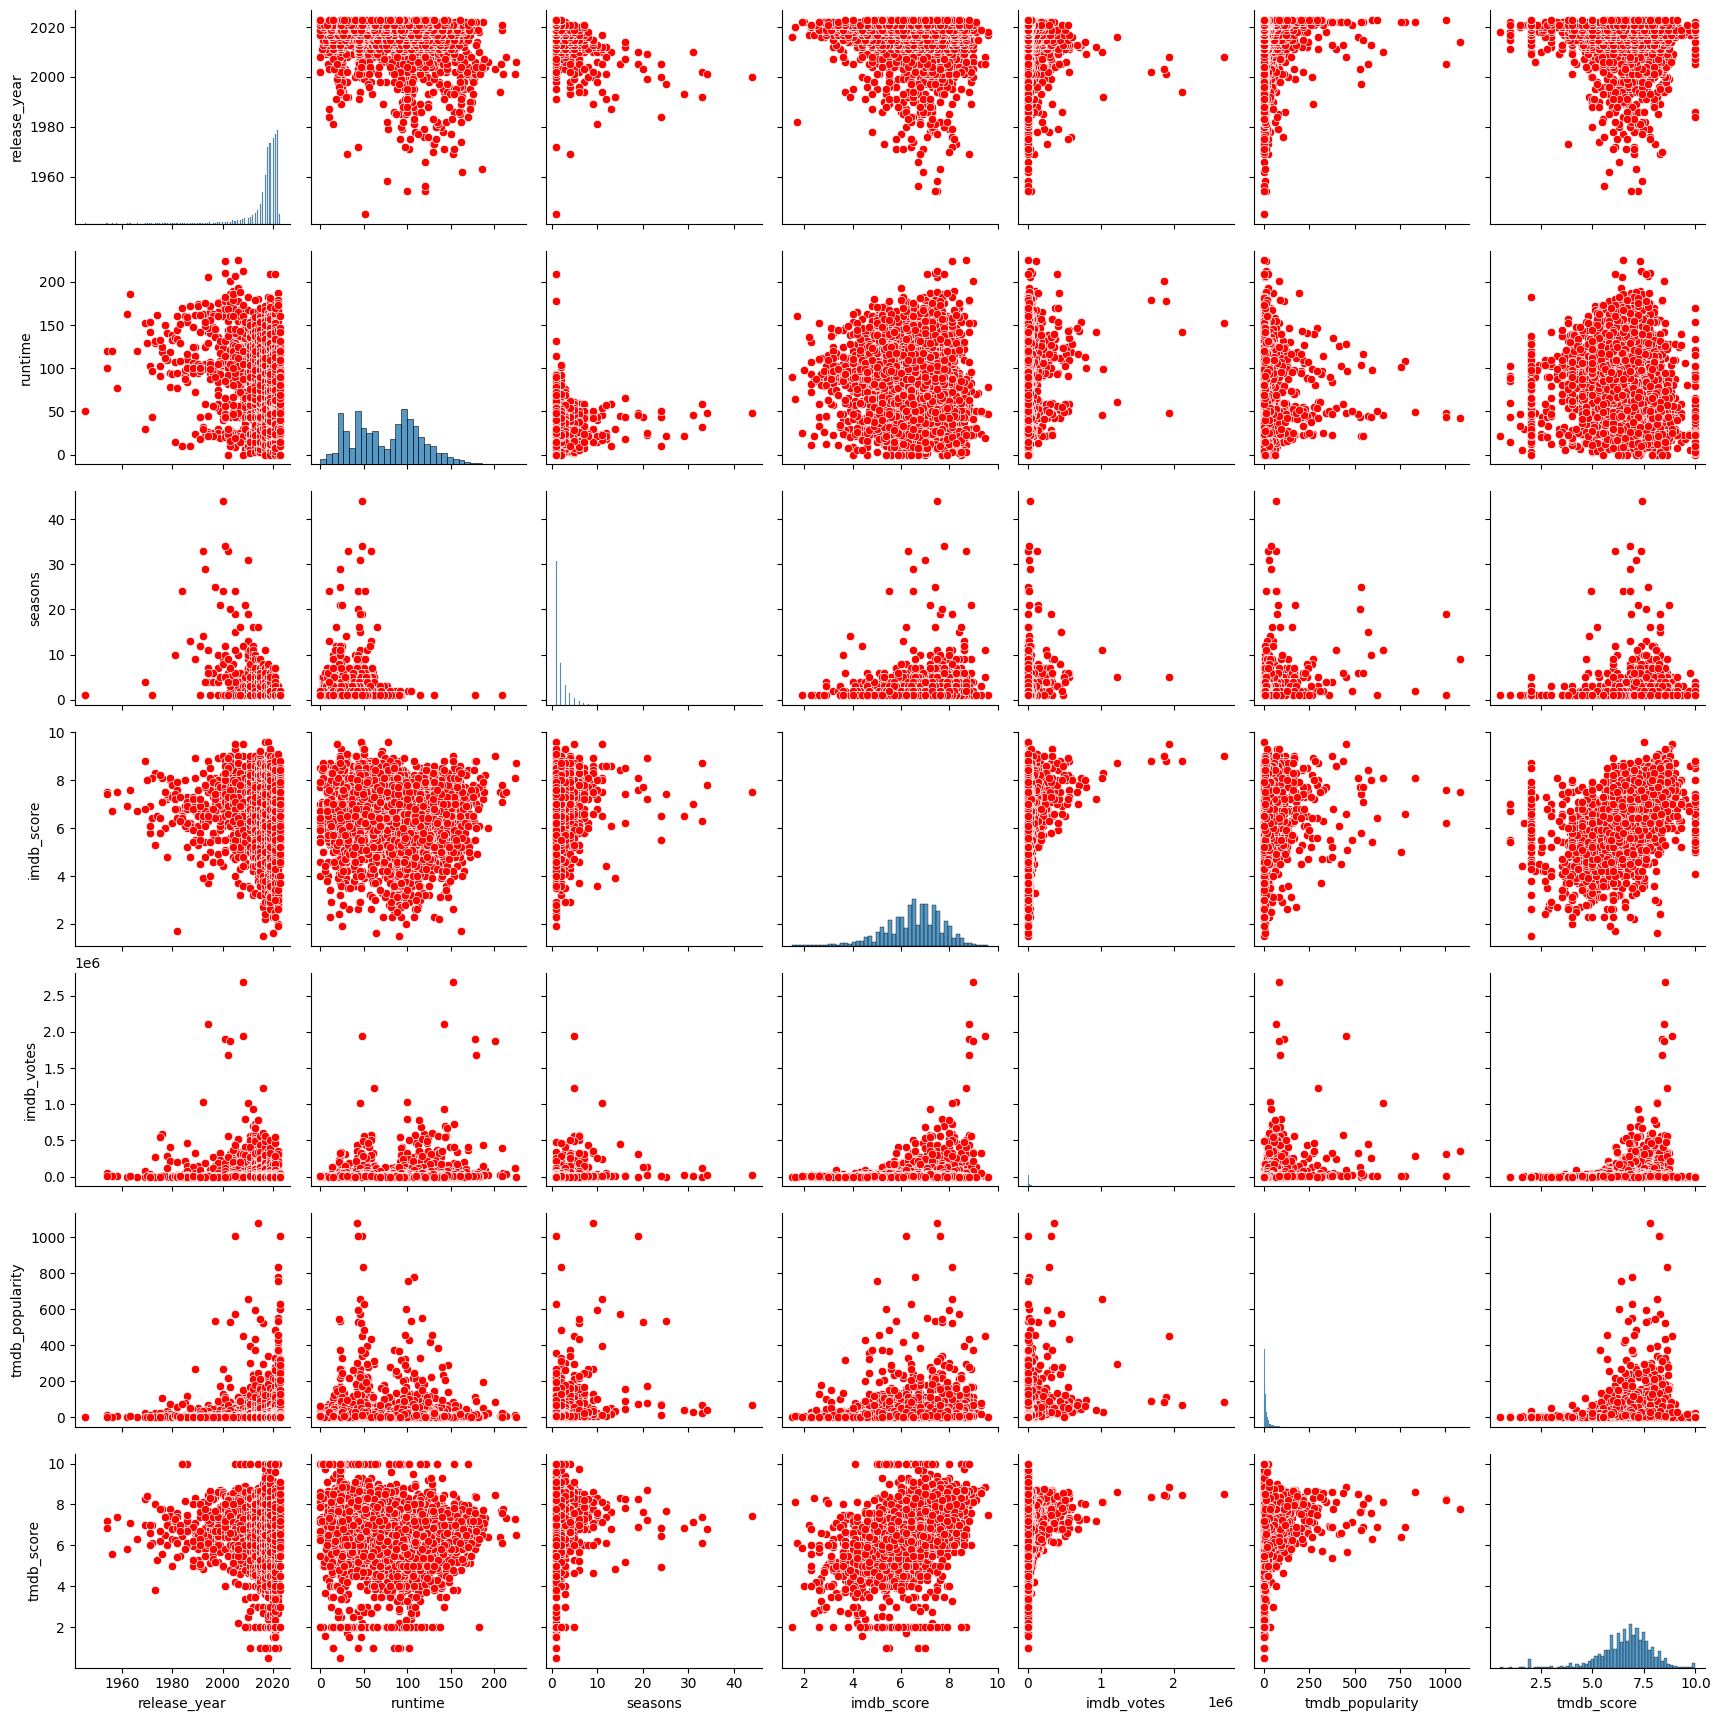

In [15]:
# Visualizing the pairplot of the numeric variables
plt.figure(figsize=(15,5))
sns.pairplot(merged_df,  plot_kws={'color': 'red'})
plt.show()

- The columns 'Runtime', 'IMDB_Score' and 'TMDB_Score' fairly follows a normal distribution
- The columns 'TMDB_Popularity' and 'Seasons' follow a right skewed relationship where 'Release_Year' follows a left skewed relationship
- There is a positive relationship between 'TMDB_Score' and 'Release_Year' as observed from the scatterplot
- The relation between 'TMDB_Score' and 'Seasons' is somewhat positive however, it drops off after a specific number of seasons

In [16]:
# Generating correlation of data set
merged_df.corr(numeric_only=True)

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.158581,-0.517217,-0.127553,-0.179493,-0.000860,-0.042478
runtime,-0.158581,1.000000,-0.126456,-0.167882,0.127428,-0.042741,-0.170774
seasons,-0.517217,-0.126456,1.000000,0.102021,0.193689,0.298419,0.080304
imdb_score,-0.127553,-0.167882,0.102021,1.000000,0.174901,0.072720,0.533163
imdb_votes,-0.179493,0.127428,0.193689,0.174901,1.000000,0.270855,0.135389
tmdb_popularity,-0.000860,-0.042741,0.298419,0.072720,0.270855,1.000000,0.163742
tmdb_score,-0.042478,-0.170774,0.080304,0.533163,0.135389,0.163742,1.000000


<Axes: >

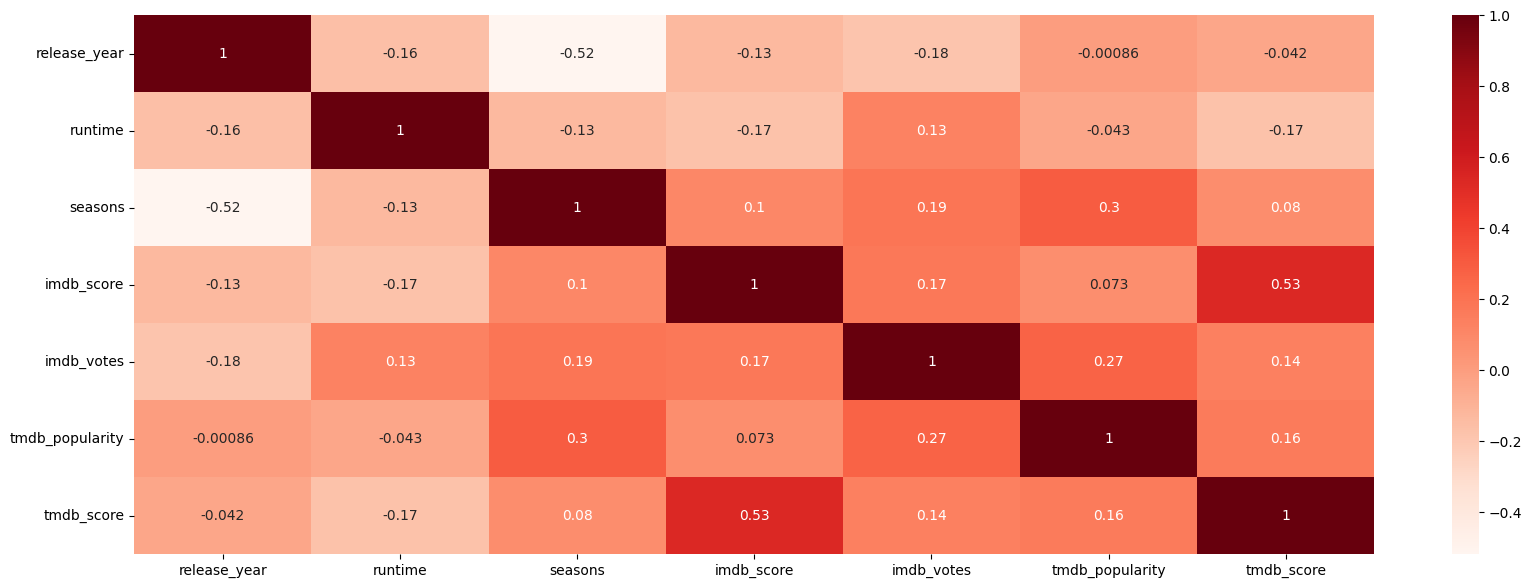

In [17]:
# Plotting Heat Map to check correlation for the data set
plt.figure(figsize=(20,7))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='Reds')

- The columns 'Seasons' and 'Release_Year' has negative correlation which indicates that an increase in Release_Year leads to a decrease in Seasons
- 'IMDB_Score' and 'TMDB_Score' has a correlation value of '0.52' which indicates that both the columns are positively correlated.
- Rest of the columns have a correlation value close to 0 which indicates no significant correlation

### Handling the 'genres' and 'production_countries' columns

In [18]:
# Handling the Genres column to fetch the first Genre from the list of Genres
merged_df['genres'] = merged_df['genres'].str.replace(r'[','').str.replace(r"'",'').str.replace(r']','')
merged_df['genre'] = merged_df['genres'].str.split(',').str[0]

# Handling the Production Countries column to fetch the first Country from the list of Country
merged_df['production_countries'] = merged_df['production_countries'].str.replace(r"[", '').str.replace(r"'", '').str.replace(r"]", '')
merged_df['production_country'] = merged_df['production_countries'].str.split(',').str[0]

In [19]:
# Removing unwanted columns for further processing
merged_df.drop(['genres', 'production_countries'], axis=1, inplace=True)

In [20]:
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,1.0,NaN,NaN,NaN,0.601,NaN,documentation,US
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,588100.0,106.361,7.782,drama,US
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,NaN,tt0077631,7.2,283316.0,33.160,7.406,romance,US
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,NaN,tt0070735,8.3,266738.0,24.616,8.020,crime,US
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,NaN,tt0079817,7.3,216307.0,75.699,7.246,drama,US


In [21]:
# Checking for unique columns in the Genre column
merged_df['genre'].unique()

array(['documentation', 'drama', 'romance', 'crime', 'fantasy', 'comedy',
       'thriller', 'action', 'animation', 'family', 'reality', 'scifi',
       'western', 'horror', '', 'war', 'music', 'history', 'sport'],
      dtype=object)

In [22]:
# Checking for unique columns in the Production Country column
merged_df['production_country'].unique()

array(['US', 'GB', 'EG', 'IN', 'DE', 'CA', 'LB', 'JP', 'AR', '', 'FR',
       'IE', 'AU', 'ET', 'HK', 'MX', 'CN', 'ES', 'CO', 'SU', 'IT', 'TR',
       'NZ', 'DK', 'TW', 'KR', 'RU', 'NG', 'PS', 'MY', 'PH', 'ZA', 'MA',
       'SE', 'SG', 'KE', 'NO', 'CL', 'SA', 'BR', 'ID', 'IS', 'IL', 'PL',
       'FI', 'CD', 'RO', 'AE', 'BE', 'NL', 'UA', 'QA', 'SY', 'GL', 'AT',
       'BY', 'JO', 'VN', 'TN', 'CZ', 'TH', 'GE', 'KH', 'CH', 'CU', 'UY',
       'PE', 'PR', 'KW', 'IR', 'PY', 'PK', 'HU', 'IQ', 'BD', 'TZ', 'CM',
       'KG', 'LU', 'SN', 'BT', 'PT', 'AO', 'GH', 'ZW', 'MW', 'GT', 'MU',
       'IO', 'BG', 'AF', 'DO', 'PA', 'FO'], dtype=object)

Both 'genre' and 'production_country' have empty values in it. We can replace it with NaNs to make it easier.

In [23]:
# Replacing the blank value with NULL in Genre and Production Country column
merged_df['genre'] = merged_df['genre'].replace('', np.nan)
merged_df['production_country'] = merged_df['production_country'].replace('',np.nan)

### Handling the 'Seasons' column

Now let's deal with the 'seasons' column. At first glance, we can say that all the null values are of type 'MOVIE'. Let's see if this is true by comparing the number of null values with the number of movie titles that do not have a value in 'seasons'.

In [24]:
# Checking the data for the type 'Movie'
merged_df[merged_df['type'] == 'MOVIE']

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,NaN,tt0075148,8.1,588100.0,106.361,7.782,drama,US
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,NaN,tt0077631,7.2,283316.0,33.160,7.406,romance,US
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,NaN,tt0070735,8.3,266738.0,24.616,8.020,crime,US
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,NaN,tt0079817,7.3,216307.0,75.699,7.246,drama,US
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,NaN,tt0071853,8.2,547292.0,20.964,7.804,fantasy,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,tm1303784,�������� ���� ����������,MOVIE,Two young boys must work together to stop robb...,2023,NaN,81,NaN,NaN,NaN,NaN,3.351,2.000,family,KW
6133,tm1260999,Sweetie,MOVIE,"���Theatre is my life,��� Y��ld��z Kenter admi...",2023,NaN,120,NaN,tt26349328,7.9,209.0,2.450,7.200,documentation,TR
6134,tm1310286,Sommore: Queen Chandelier,MOVIE,This Queen of Comedy shines as she takes the s...,2023,NaN,69,NaN,tt21033382,6.1,91.0,1.960,NaN,comedy,US
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,NaN,80,NaN,tt14922926,5.2,18.0,1.357,4.000,drama,NG


In [25]:
# Checking whether the value for seasons is blank for all the records with types 'Movie'
len(merged_df.loc[(merged_df['seasons'].isna()) & (merged_df['type'] == 'MOVIE')]) == merged_df.seasons.isna().sum()

True

So, all the null values from 'season' is from movies. Let's change the null values to 0.

In [26]:
# Setting the value for all the blank entries of seasons as 0
merged_df['seasons'].fillna(0, inplace=True)

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\2003247516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['seasons'].fillna(0, inplace=True)


In [27]:
merged_df.head()

,id,title,type,description,release_year,age_certification,runtime,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,1.0,NaN,NaN,NaN,0.601,NaN,documentation,US
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,0.0,tt0075148,8.1,588100.0,106.361,7.782,drama,US
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,0.0,tt0077631,7.2,283316.0,33.160,7.406,romance,US
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,0.0,tt0070735,8.3,266738.0,24.616,8.020,crime,US
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,0.0,tt0079817,7.3,216307.0,75.699,7.246,drama,US


In [28]:
# Checking for remaining NULL values in the DataFrame
merged_df.isna().sum()

id                       0
title                    0
type                     0
description             23
release_year             0
age_certification     2743
runtime                  0
seasons                  0
imdb_id                396
imdb_score             468
imdb_votes             484
tmdb_popularity         76
tmdb_score             252
genre                   57
production_country     176
dtype: int64

Now, let's drop the 'imdb_id', 'age_certification' and 'character' columns.

In [29]:
# Dropping unwanted columns not needed for processing
merged_df.drop(['imdb_id','age_certification'], axis=1, inplace=True)

In [30]:
# Replacing NULL values with N/A in Description column
merged_df['description'].fillna('N/A', inplace = True)

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\3026196239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['description'].fillna('N/A', inplace = True)


In [31]:
# Replacing Null Categorical values with the mode of that column
for i in merged_df[['genre', 'production_country']]:
    merged_df[i].fillna(merged_df[i].mode()[0], inplace=True)

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\3887438126.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[i].fillna(merged_df[i].mode()[0], inplace=True)


In [32]:
merged_df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
runtime                 0
seasons                 0
imdb_score            468
imdb_votes            484
tmdb_popularity        76
tmdb_score            252
genre                   0
production_country      0
dtype: int64

### Median Imputation


Median imputation involves replacing missing values in a dataset with the median value of the respective variable. This technique is frequently employed during data preprocessing to address missing data.

The process of median imputation begins with calculating the median value of a variable using the available data. Subsequently, any missing values within the variable are substituted with this calculated median value.

While median imputation is a straightforward and efficient method for handling missing data, it operates under certain assumptions. It assumes that missing data occur at random and that the variable follows a symmetric distribution.

Refer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
# Extracting non NULL records into a separate DataFrame to fit for MICE Imputation
non_null_df = merged_df[~merged_df.isnull().any(axis=1)]
non_null_df.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,119,0.0,8.1,588100.0,106.361,7.782,drama,US
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,110,0.0,7.2,283316.0,33.160,7.406,romance,US
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,129,0.0,8.3,266738.0,24.616,8.020,crime,US
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,119,0.0,7.3,216307.0,75.699,7.246,drama,US
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,0.0,8.2,547292.0,20.964,7.804,fantasy,GB


In [35]:
# Use Median Imputation to fill in missing values
columns_to_impute = ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']
imputer = SimpleImputer(strategy='median')
imputed_values = imputer.fit_transform(merged_df[columns_to_impute])

In [36]:
# Using MICE Imputation to impute Missing Values
merged_df.loc[:, columns_to_impute] = imputed_values

In [37]:
# Checking for NULL values in all the columns
merged_df.isna().sum()

id                    0
title                 0
type                  0
description           0
release_year          0
runtime               0
seasons               0
imdb_score            0
imdb_votes            0
tmdb_popularity       0
tmdb_score            0
genre                 0
production_country    0
dtype: int64

In [38]:
# Displaying information for each column of the DataFrame
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6137 non-null   object 
 1   title               6137 non-null   object 
 2   type                6137 non-null   object 
 3   description         6137 non-null   object 
 4   release_year        6137 non-null   int64  
 5   runtime             6137 non-null   int64  
 6   seasons             6137 non-null   float64
 7   imdb_score          6137 non-null   float64
 8   imdb_votes          6137 non-null   float64
 9   tmdb_popularity     6137 non-null   float64
 10  tmdb_score          6137 non-null   float64
 11  genre               6137 non-null   object 
 12  production_country  6137 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 623.4+ KB


In [39]:
# Fetching the total rows and columns of the DataFrame
merged_df.shape

(6137, 13)

## Content Based Filtering

- Content-based filtering is a recommendation system technique that suggests items to users based on the characteristics of items they have previously liked or interacted with.
- It operates under the assumption that user preferences are influenced by the features or attributes of the items they engage with, rather than external factors like demographics or social connections.
- The process begins by constructing a user profile derived from their past actions, such as liking, rating, or purchasing items.
- The system then identifies common features or attributes among the items in the user's profile and utilizes this information to recommend new items that share similar features.
- For instance, in a movie recommendation system, a user's profile might include data on the genres of movies they have enjoyed, such as action or romantic comedies.
- Based on this profile, the system suggests other movies with similar genres or attributes, such as additional action films or romantic comedies.

More on Content-Based FIltering here: https://botpenguin.com/glossary/content-based-filtering 

![CBF](CBF.png)

## Designing Recommender based on Plot

Here, we will build a recommendation system based on the description of titles. We will calculate pairwise similarity scores for all movies/tv shows based on their descriptions and recommend titles with similar scores.



In [40]:
# Printing the list of descriptions for the titles
merged_df['description'].head()

0    This collection includes 12 World War II-era p...
1    When world heavyweight boxing champion, Apollo...
2    Australian good girl Sandy and greaser Danny f...
3    A novice con man teams up with an acknowledged...
4    After Rocky goes the distance with champ Apoll...
Name: description, dtype: object

## Adding Streaming Platform Section

We are adding a separate column called 'streaming_platform' to keep track of the platforms upon which the title is being streamed. When our data set contains data from various streaming platforms, it will be helpful to keep track of them.

In [41]:
# Generating a list to add the streaming platform to each title
platform = []
for i in merged_df['id']:
    movie_streaming = []
    if i in netflix_titles['id'].values:
        movie_streaming.append('Netflix')

    platform.append(movie_streaming)

In [42]:
# Setting the list value into the Streaming Platform column
merged_df['streaming_platform'] = platform

In [43]:
merged_df.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,1.0,6.6,2095.0,0.601,6.791,documentation,US,[Netflix]
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,119,0.0,8.1,588100.0,106.361,7.782,drama,US,[Netflix]
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,110,0.0,7.2,283316.0,33.160,7.406,romance,US,[Netflix]
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,129,0.0,8.3,266738.0,24.616,8.020,crime,US,[Netflix]
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,119,0.0,7.3,216307.0,75.699,7.246,drama,US,[Netflix]


## Separating the data in Movies and TV Shows

In [44]:
# Extracting Movies from the Dataset consisting of both Movies and TV Shows
movies = merged_df[merged_df['type'] == 'MOVIE'].copy().reset_index()
movies.drop(['index'], axis=1, inplace=True)

# Extracting TV Shows from the Dataset consisting of both Movies and TV Shows
shows = merged_df[merged_df['type'] == 'SHOW'].copy().reset_index()
shows.drop(['index'], axis=1, inplace=True)

In [45]:
movies.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,119,0.0,8.1,588100.0,106.361,7.782,drama,US,[Netflix]
1,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,110,0.0,7.2,283316.0,33.160,7.406,romance,US,[Netflix]
2,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,129,0.0,8.3,266738.0,24.616,8.020,crime,US,[Netflix]
3,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,119,0.0,7.3,216307.0,75.699,7.246,drama,US,[Netflix]
4,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,0.0,8.2,547292.0,20.964,7.804,fantasy,GB,[Netflix]


In [46]:
shows.head()

,id,title,type,description,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,genre,production_country,streaming_platform
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,1.0,6.6,2095.0,0.601,6.791,documentation,US,[Netflix]
1,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,30,4.0,8.8,75654.0,24.773,8.258,comedy,GB,[Netflix]
2,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,43,1.0,8.1,2199.0,1.475,7.000,comedy,GB,[Netflix]
3,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,24,9.0,8.9,326487.0,270.409,8.294,comedy,US,[Netflix]
4,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,10,24.0,6.5,5528.0,72.342,6.483,animation,GB,[Netflix]


## Term Frequency-Inverse Document Frequency (TF-IDF)

- Term Frequency-Inverse Document Frequency (TF-IDF) is a numerical statistic used in natural language processing and information retrieval to evaluate the importance of a term within a document or a collection of documents.

- TF-IDF takes into account the frequency of a term (i.e., how often it appears) in a document, as well as its rarity in the entire collection of documents. It calculates the importance of a term in a document by multiplying its frequency (TF) by its rarity (IDF).

- TF is calculated as the number of times a term appears in a document divided by the total number of terms in the document. IDF is calculated as the logarithm of the total number of documents in the collection divided by the number of documents containing the term. This means that rare terms will have a higher IDF, while common terms will have a lower IDF.

- The TF-IDF score of a term in a document indicates how important or relevant that term is to that document. Terms with higher TF-IDF scores are considered to be more important or relevant to a document than terms with lower TF-IDF scores. This can be used in a variety of applications, such as text classification, document ranking, and information retrieval.

Refer: https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

In [47]:
# Define a TF-IDF Vectorizer Object to remove English stop words
tfidf = TfidfVectorizer(stop_words = 'english')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix_movies = tfidf.fit_transform(movies['description'])
tfidf_matrix_shows = tfidf.fit_transform(shows['description'])

# Output the shape of tfidf_matrix
print(f'Shape for Movies: {tfidf_matrix_movies.shape}')
print(f'Shape for Shows: {tfidf_matrix_shows.shape}')

Shape for Movies: (3831, 16737)
Shape for Shows: (2306, 11381)


We see that over **16k** different words were used to describe the 3831 titles in our movies dataset, and **11k** different words to describe the 2306 titles in our shows dataset.

## Cosine Similarity

Cosine similarity serves as a metric for gauging the similarity between two vectors within a multidimensional space. It finds extensive application in natural language processing and information retrieval, primarily for comparing documents or text data.

The calculation of cosine similarity between two vectors involves taking their dot product and dividing it by the product of their magnitudes. Essentially, it quantifies the cosine of the angle formed between the two vectors.

Within text data analysis, cosine similarity finds utility in assessing the similarity between two documents or sets of words.

Formula:

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaEEPQk9z7Fu1ij0WBFJ0HUQWQNfBvCM87VG4F64j0&s">

Now, we need to calculate the similarity score to calculate a numeric quantity that denotes the similarity between two movies/shows.

Refer: https://www.geeksforgeeks.org/cosine-similarity/

In [48]:
# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_matrix_movies, tfidf_matrix_movies)
cosine_sim_shows = linear_kernel(tfidf_matrix_shows, tfidf_matrix_shows)

Now we create a way to identify the index of a movie/show in our data, given its title.

In [49]:
indices_movies = pd.Series(movies.index, index=movies['title'])
indices_shows = pd.Series(shows.index, index=shows['title'])

In [50]:
def get_title(title,indices):
    # Function to create the 'index searcher' that searches for user's title index
    try:
        index = indices[title]
    except:
        print("\n  Title not found")
        return None

    if isinstance(index, np.int64):
        return index

    else:
        rt = 0
        print("Select a title: ")
        for i in range(len(index)):
            print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
            print(f"({movies['release_year'].iloc[index[i]]})")
        rt = int(input())
        return index[rt]

Now, we define functions that accept a movie/show title as input and produce a list of the 10 most similar titles.

In [51]:
def get_recommendations_movie(title, cosine_sim=cosine_sim_movies):
    # Function that takes a movie title as input and outputs top 10 similar movies in return

    title = get_title(title, indices_movies)
    if title == None:
        return

    idx = indices_movies[title]

    print(f"Title: {movies['title'].iloc[idx]} |  Year: {movies['release_year'].iloc[idx]}")

    print('**' * 40)

    # Fetching the pairwise similarity scores of all movies for that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Extracting the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Fetching the movie indices
    movie_indices = [i[0] for i in sim_scores]

    print(movies[['title', 'release_year','streaming_platform']].iloc[movie_indices])

    print('**' * 40)

In [52]:
def get_recommendations_show(title, cosine_sim=cosine_sim_shows):
    # Function that takes a TV show title as input and outputs top 10 similar movies in return
    title = get_title(title, indices_shows)
    if title == None:
        return

    idx = indices_shows[title]

    print(f"Title: {shows['title'].iloc[idx]} | Year: {shows['release_year'].iloc[idx]}")

    print('**' * 40)

    # Fetching the pairwise similarity scores of all shows for that show
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Extracting the scores of the 10 most similar shows
    sim_scores = sim_scores[1:11]

    # Fetching the show indices
    show_indices = [i[0] for i in sim_scores]

    print(shows[['title', 'release_year', 'streaming_platform']].iloc[show_indices])

    print('**' * 40)

## Generating Recommendations Based on Movies and TV Shows

In [53]:
# Fetching movie recommendations for the movie 'Dostana'
get_recommendations_movie('Dostana')

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\339050285.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{i} - {movies['title'].iloc[index[i]]}", end=' ')
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\339050285.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"({movies['release_year'].iloc[index[i]]})")


Select a title: 
0 - Dostana (1982)
1 - Dostana (2008)


 1


Title: Dostana |  Year: 2008
********************************************************************************
                                 title  release_year streaming_platform
1341                 Irreplaceable You          2018          [Netflix]
2464                        The Bridge          2019          [Netflix]
1028                    Belleville Cop          2018          [Netflix]
2511  Me Against You: Mr. S's Vendetta          2020          [Netflix]
2507               Kill Me If You Dare          2019          [Netflix]
2932                365 Days: This Day          2022          [Netflix]
2029                 Light in the Dark          2020          [Netflix]
3486                      Sweet & Sour          2021          [Netflix]
312            Karthik Calling Karthik          2010          [Netflix]
448                 Pyaar Ka Punchnama          2011          [Netflix]
********************************************************************************


C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\339050285.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return index[rt]
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\3535024144.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices_movies[title]


The recommender suggested quite similar movies based on the movie name provided. The other suggestions belong to the same franchise which also plays a big role.

In [54]:
# Fetching TV Show recommendations for the show 'Grey's Anatomy'
get_recommendations_show("Grey's Anatomy")

Title: Grey's Anatomy | Year: 2005
********************************************************************************
                   title  release_year streaming_platform
1194   Hospital Playlist          2020          [Netflix]
1197          Lenox Hill          2020          [Netflix]
1778  My Unorthodox Life          2021          [Netflix]
299             Crashing          2016          [Netflix]
458        New Amsterdam          2018          [Netflix]
1166      Family Reunion          2019          [Netflix]
2025          Under Fire          2021          [Netflix]
1225    The English Game          2020          [Netflix]
142    The Mindy Project          2012          [Netflix]
812          Millennials          2018          [Netflix]
********************************************************************************


C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_29980\510068055.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  idx = indices_shows[title]


The TV Shows recommended all belong to the Comedy genre which can make a good fit for the viewers who watched 'Seinfield'.

In [55]:
# Verifying recommendations for a movie not part of the data set
get_recommendations_movie('Sample_Movie')


  Title not found


In [56]:
# Verifying recommendations for a TV show not part of the data set
get_recommendations_show('Sample_TV_Show')


  Title not found


## Conclusion

In conclusion, this notebook provides a thorough and practical guide for building a content-based recommendation system for movies and TV shows using real Netflix data. By utilizing metadata from movies and TV shows, the system can recommend items that align with a user's past preferences. The notebook covers all essential steps, including data preprocessing, feature engineering, and similarity score calculation. This system empowers users to discover new content tailored to their tastes and viewing history. Overall, it serves as a valuable resource for those interested in developing content-based recommendation systems, offering clear explanations, code examples, and visual aids throughout the process.

## References

1. GeeksforGeeks
2. towardsdatascience
3. scikitlearn documentation
4. Kaggle
5. botpenguin.com
6. Medium